## Deskripsi Proyek

Proyek ini bertujuan untuk menganalisis data deret waktu (time series) dari pasar saham saham teknologi terkemuka (Apple, Amazon, Google, dan Microsoft) menggunakan data historis dari Yahoo Finance. Analisis mencakup visualisasi harga penutupan dan volume perdagangan dari waktu ke waktu, perhitungan dan visualisasi rata-rata pergerakan (moving average), analisis pengembalian harian saham dan korelasinya, serta evaluasi risiko investasi berdasarkan pengembalian yang diharapkan dan standar deviasi.

Selain analisis historis, proyek ini juga mencoba memprediksi harga penutupan saham Apple (AAPL) di masa depan menggunakan model deep learning CNN-Bidirectional Long Short Term Memory (BiLSTM). Data harga penutupan diskalakan dan dibagi menjadi set data latih dan uji untuk melatih dan mengevaluasi model. Performa model dievaluasi menggunakan metrik seperti Root Mean Squared Error (RMSE), Mean Squared Error (MSE), dan Mean Absolute Error (MAE). Hasil prediksi divisualisasikan untuk membandingkan harga penutupan aktual dan prediksi pada data uji.

Proyek ini mengeksplorasi berbagai teknik analisis data dan pemodelan untuk memahami perilaku pasar saham dan mencoba memprediksi tren harga di masa depan.

Data deret waktu (Time Series) adalah serangkaian titik data yang diurutkan berdasarkan waktu. Data deret waktu ada di mana-mana, sehingga kemampuan untuk memanipulasinya sangat penting bagi analis data atau ilmuwan data.

Dalam catatan ini, kita akan menemukan dan menjelajahi data dari pasar saham, khususnya beberapa saham teknologi (Apple, Amazon, Google, dan Microsoft). Kita akan belajar cara menggunakan yfinance untuk mendapatkan informasi saham, serta memvisualisasikan berbagai aspeknya menggunakan Seaborn dan Matplotlib. Kita juga akan melihat beberapa cara untuk menganalisis risiko sebuah saham berdasarkan riwayat kinerjanya. Selain itu, kita akan mencoba memprediksi harga saham di masa depan menggunakan metode CNN-Bidirectional Long Short Term Memory (BiLSTM)!

Selama proses ini, kita akan menjawab pertanyaan-pertanyaan berikut:

  1.) Bagaimana perubahan harga saham dari waktu ke waktu?
  
  2.) Bagaimana rata-rata pergerakan (moving average) dari berbagai saham?
  
  3.) Berapa rata-rata keuntungan harian saham?
  
  4.) Bagaimana korelasi antara saham yang berbeda?
  
  5.) Seberapa besar nilai yang kita pertaruhkan dengan berinvestasi pada saham tertentu?
  
  6.) Bagaimana kita dapat mencoba memprediksi perilaku saham di masa depan? (Memprediksi harga penutupan saham APPLE inc menggunakan Cnn-BiLSTM)

***

## Mendapatkan Data
Langkah pertama adalah mendapatkan data dan memuatnya ke dalam memori. Kita akan mendapatkan data sahamdari situs web Yahoo Finance. Yahoo Finance adalah sumber yang kaya akan data pasar keuangan dan alat untuk menemukan investasi yang menarik. Untuk mendapatkan data dari Yahoo Finance, kita akan menggunakan pustaka (library) yfinance yang menawarkan cara yang efisien dan Pythonic untuk mengunduh data pasar dari Yahoo. Simak artikel ini untuk mempelajari lebih lanjut tentang yfinance: [Reliably download historical market data from with Python](https://aroussi.com/post/python-yahoo-finance)


In [ ]:
import pandas as pd
import numpy as np
# For time stamps
from datetime import datetime
# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr

##import matplotlib.pyplot as plt
##import seaborn as sns
##sns.set_style('whitegrid')
##plt.style.use("fivethirtyeight")
##%matplotlib inline

# Read the CSV file into a DataFrame
#df = pd.read_csv('stocks.csv')

# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)


company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name

df = pd.concat(company_list, axis=0)
df.tail(10)

df.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price                       Adj Close       Close        High         Low  \
Ticker                           AAPL        AAPL        AAPL        AAPL   
Date                                                                        
2023-12-04 00:00:00+00:00  188.506500  189.429993  190.050003  187.449997   
2023-12-05 00:00:00+00:00  192.477051  193.419998  194.399994  190.179993   
2023-12-06 00:00:00+00:00  191.382416  192.320007  194.759995  192.110001   
2023-12-07 00:00:00+00:00  193.322906  194.270004  195.000000  193.589996   
2023-12-08 00:00:00+00:00  194.755890  195.710007  195.990005  193.669998   

Price                            Open      Volume company_name Adj Close  \
Ticker                           AAPL        AAPL                   GOOG   
Date                                                                       
2023-12-04 00:00:00+00:00  189.979996  43389500.0        APPLE       NaN   
2023-12-05 00:00:00+00:00  190.210007  66628400.0        APPLE       NaN   
2023-12-06 00:00:00+00:00  194.449997  41089700.0        APPLE       NaN   
2023-12-07 00:00:00+00:00  193.630005  47477700.0        APPLE       NaN   
2023-12-08 00:00:00+00:00  194.199997  53377300.0        APPLE       NaN   

Price                     Close High  ...       Low Open Volume Adj Close  \
Ticker                     GOOG GOOG  ... MSFT MSFT MSFT   MSFT      AMZN   
Date                                  ...                                   
2023-12-04 00:00:00+00:00   NaN  NaN  ...  NaN  NaN  NaN    NaN       NaN   
2023-12-05 00:00:00+00:00   NaN  NaN  ...  NaN  NaN  NaN    NaN       NaN   
2023-12-06 00:00:00+00:00   NaN  NaN  ...  NaN  NaN  NaN    NaN       NaN   
2023-12-07 00:00:00+00:00   NaN  NaN  ...  NaN  NaN  NaN    NaN       NaN   
2023-12-08 00:00:00+00:00   NaN  NaN  ...  NaN  NaN  NaN    NaN       NaN   

Price                     Close High  Low Open Volume  
Ticker                     AMZN AMZN AMZN AMZN   AMZN  
Date                                                   
2023-12-04 00:00:00+00:00   NaN  NaN  NaN  NaN    NaN  
2023-12-05 00:00:00+00:00   NaN  NaN  NaN  NaN    NaN  
2023-12-06 00:00:00+00:00   NaN  NaN  NaN  NaN    NaN  
2023-12-07 00:00:00+00:00   NaN  NaN  NaN  NaN    NaN  
2023-12-08 00:00:00+00:00   NaN  NaN  NaN  NaN    NaN  

[5 rows x 25 columns]

Setelah meninjau isi data kita, terlihat bahwa data tersebut numerik dan tanggal menjadi indeks datanya. Perhatikan juga bahwa data akhir pekan tidak ada dalam catatan.

**Catatan:** Menggunakan `globals()` bukanlah cara yang rapi untuk mengatur nama `DataFrame`, namun ini sederhana. Sekarang kita memiliki data kita, mari lakukan analisis data dasar dan periksa data kita.


## Statistik Deskriptif tentang Data

Metode `.describe()` menghasilkan statistik deskriptif. Statistik deskriptif mencakup ukuran yang merangkum tendensi sentral, dispersi, dan bentuk distribusi dataset, tidak termasuk nilai `NaN`.

Metode ini menganalisis seri numerik dan objek, serta set kolom `DataFrame` dengan tipe data campuran. Outputnya akan bervariasi tergantung pada apa yang disediakan. Lihat catatan di bawah untuk detail lebih lanjut.


In [ ]:
# Summary Stats
AAPL.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
count,250.000000,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,202.188780,202.700160,204.371960,200.794960,202.523600,5.774099e+07
std,22.454180,22.271332,22.417871,21.910593,22.193261,3.054143e+07
min,164.405121,165.000000,166.399994,164.080002,165.350006,2.811130e+07
25%,183.385326,184.174995,185.104996,182.155003,183.642502,4.215368e+07
50%,195.704208,196.389999,197.190002,194.610001,196.095001,5.047070e+07
75%,224.875713,225.007496,226.825001,223.077496,224.902496,6.462548e+07
max,237.330002,237.330002,237.809998,234.449997,236.479996,3.186799e+08


Kita hanya memiliki 255 catatan dalam satu tahun karena akhir pekan tidak termasuk dalam data.


## Informasi Tentang Data

Metode `.info()` mencetak informasi tentang DataFrame, termasuk `dtype` indeks dan kolom, jumlah nilai yang tidak kosong (non-null), dan penggunaan memori.


In [ ]:
# General info
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2023-12-04 00:00:00+00:00 to 2024-11-29 00:00:00+00:00
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Adj Close, AAPL)  250 non-null    float64
 1   (Close, AAPL)      250 non-null    float64
 2   (High, AAPL)       250 non-null    float64
 3   (Low, AAPL)        250 non-null    float64
 4   (Open, AAPL)       250 non-null    float64
 5   (Volume, AAPL)     250 non-null    int64  
 6   (company_name, )   250 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.6+ KB


In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

## Closing Price

Closing Price adalah harga terakhir dimana saham diperdagangkan selama hari perdagangan reguler. Harga penutupan saham merupakan patokan standar yang digunakan investor untuk melacak kinerja saham dari waktu ke waktu.


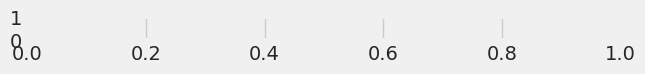

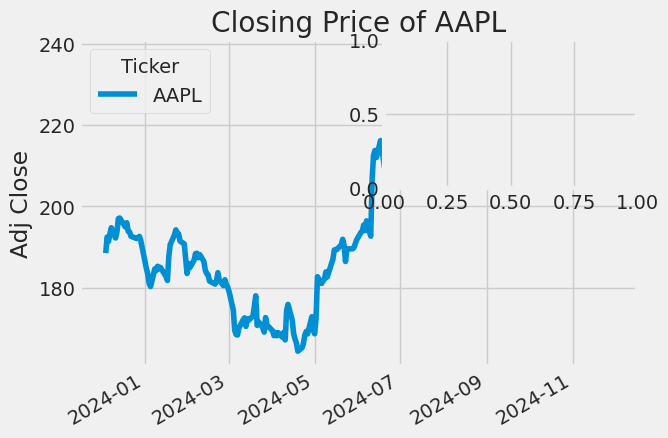

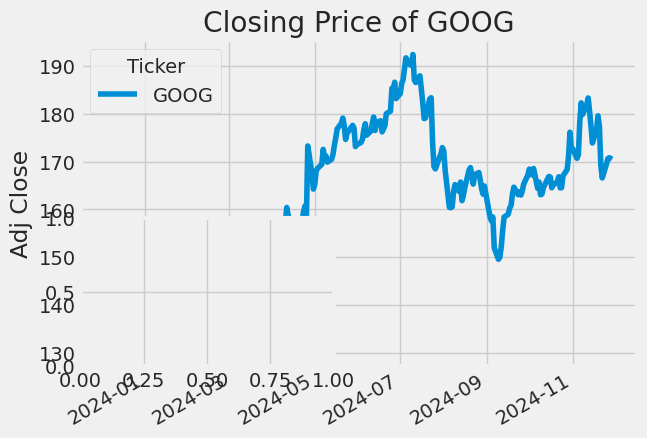

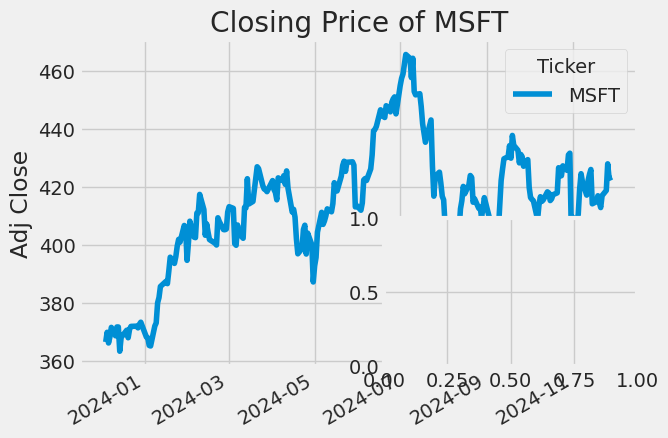

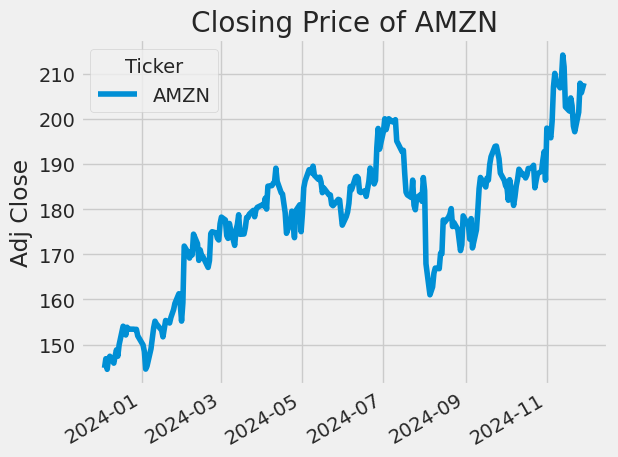

In [ ]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Adj Close'].plot()
    plt.ylabel('Adj Close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {tech_list[i - 1]}")

plt.tight_layout()

## Volume of Sales
Volume adalah jumlah aset atau sekuritas yang berpindah tangan selama periode waktu tertentu, seringkali selama sehari. Misalnya, volume perdagangan saham akan mengacu pada jumlah saham sekuritas yang diperdagangkan antara pembukaan dan penutupan hariannya. Volume perdagangan, dan perubahan volume dari waktu ke waktu, adalah input penting bagi para technical traders.

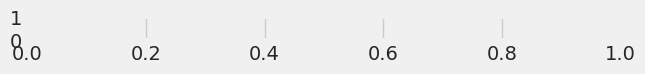

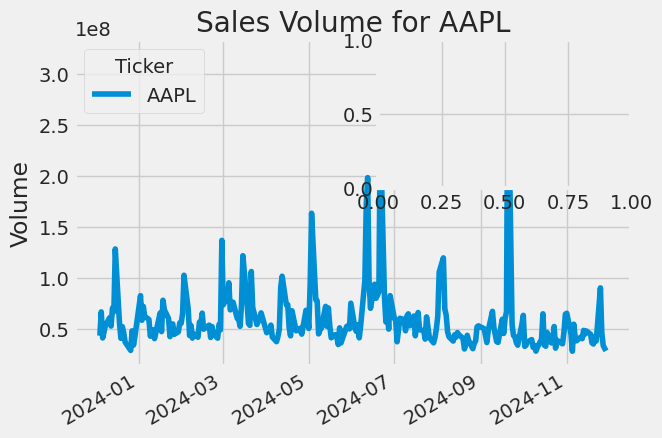

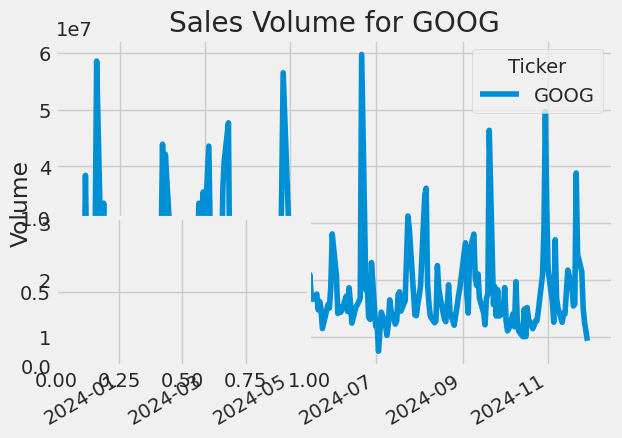

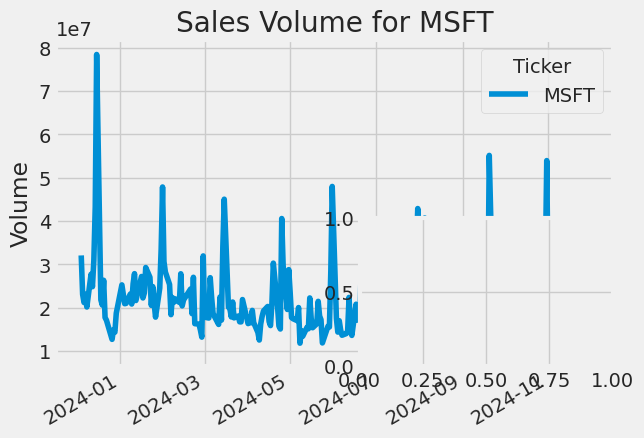

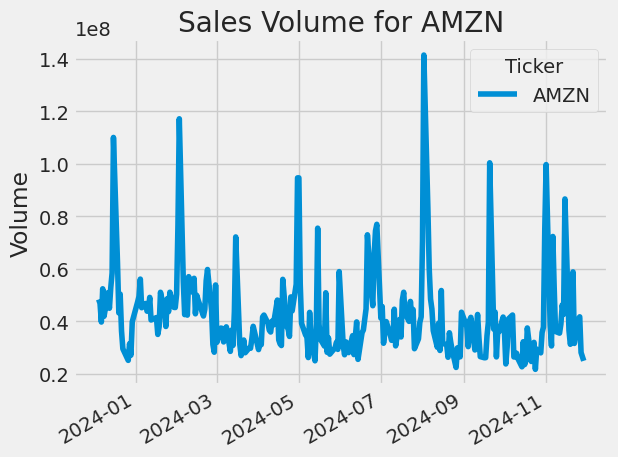

In [ ]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Volume'].plot()
    plt.ylabel('Volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {tech_list[i - 1]}")

plt.tight_layout()

Sekarang setelah kita melihat visualisasi untuk harga penutupan dan volume yang diperdagangkan setiap hari, mari kita lanjutkan dan hitung rata-rata bergerak (moving average) untuk saham tersebut.


# 2.  Bagaimana rata-rata pergerakan (moving average) dari berbagai saham?

Moving Average/MA adalah alat analisis teknikal sederhana yang menghaluskan data harga dengan membuat rata-rata harga yang terus diperbarui. Rata-rata diambil selama periode waktu tertentu, seperti 10 hari, 20 menit, 30 minggu, atau periode waktu lain yang dipilih oleh trader.

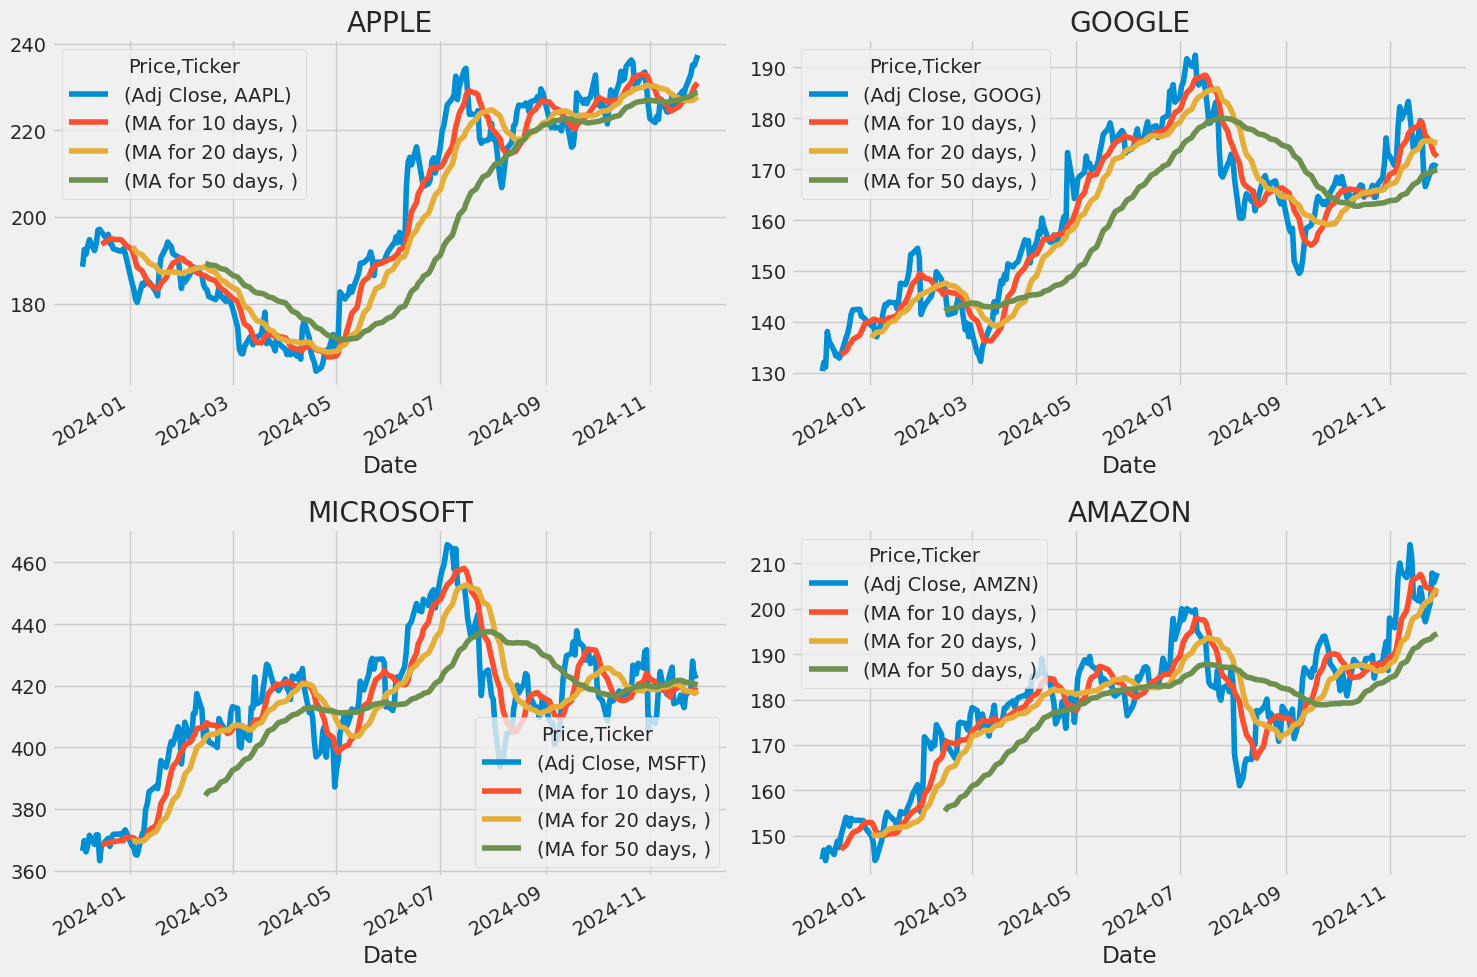

In [ ]:
ma_day = [10, 20, 50]

for ma in ma_day:
    for company in company_list:
        column_name = f"MA for {ma} days"
        company[column_name] = company['Adj Close'].rolling(ma).mean()


fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

Kita melihat pada grafik bahwa nilai terbaik untuk mengukur rata-rata bergerak adalah 10 dan 20 hari karena kita masih dapat menangkap tren dalam data tanpa noise (gangguan acak).


# 3. Berapa rata-rata keuntungan harian saham?

Setelah melakukan analisis dasar, mari kita melangkah lebih dalam. Kita sekarang akan menganalisis risiko saham. Untuk melakukannya, kita perlu melihat lebih dekat perubahan harian saham, bukan hanya nilai absolutnya. Mari kita gunakan pandas untuk mengambil data pengembalian harian (daily returns) untuk saham Apple.


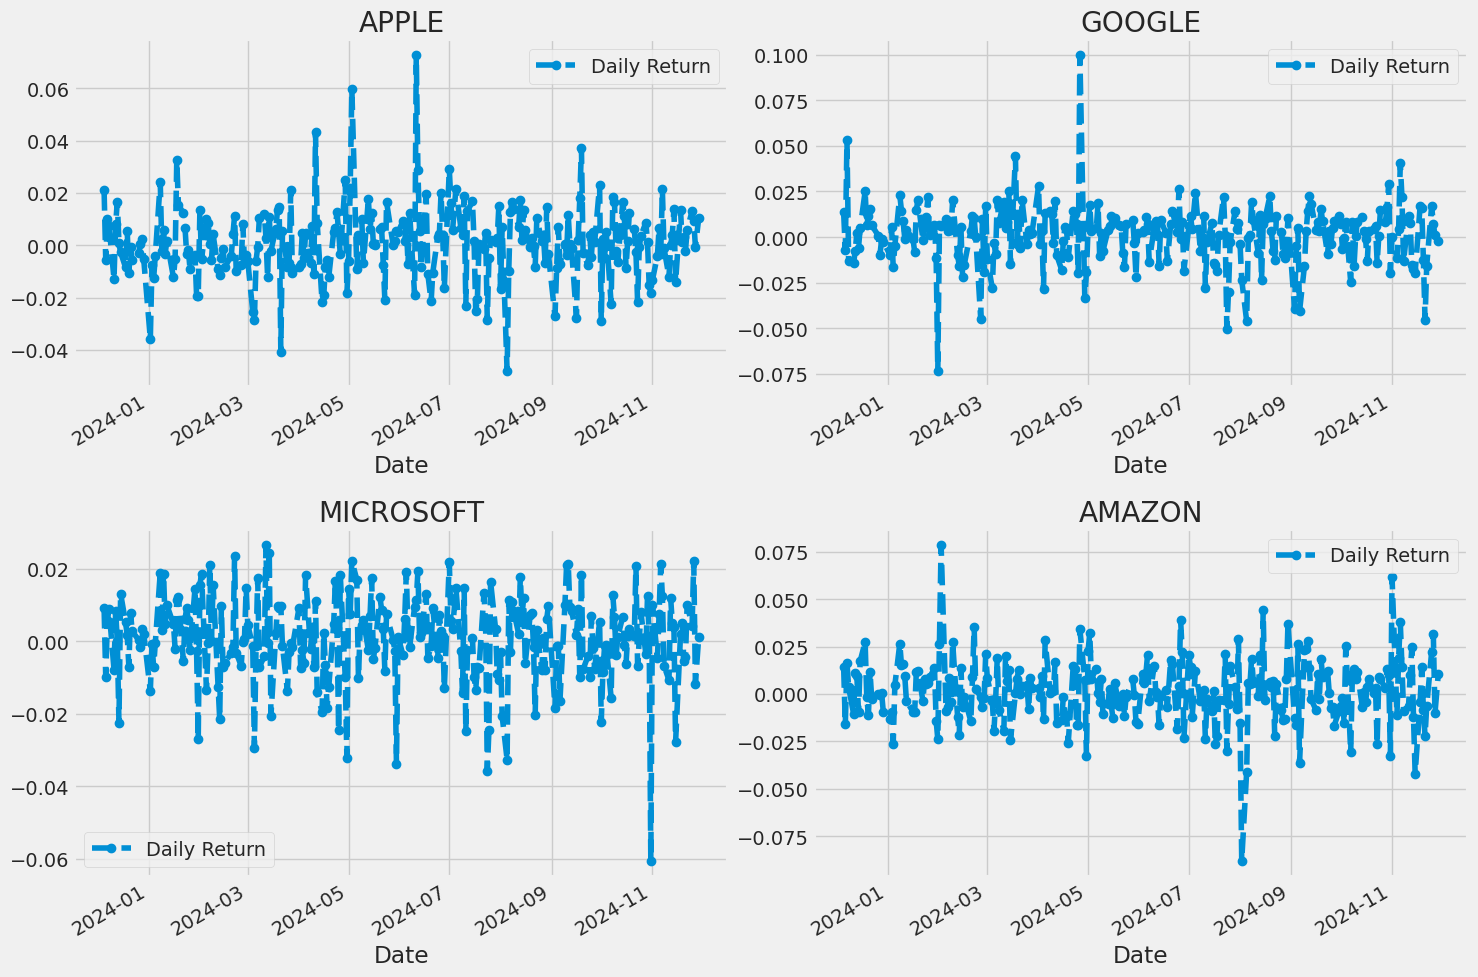

In [ ]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
    company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()

Bagus, sekarang mari kita lihat gambaran keseluruhan dari rata-rata pengembalian harian menggunakan histogram. Kita akan menggunakan seaborn untuk membuat histogram dan plot KDE (Kernel Density Estimation) pada gambar yang sama.


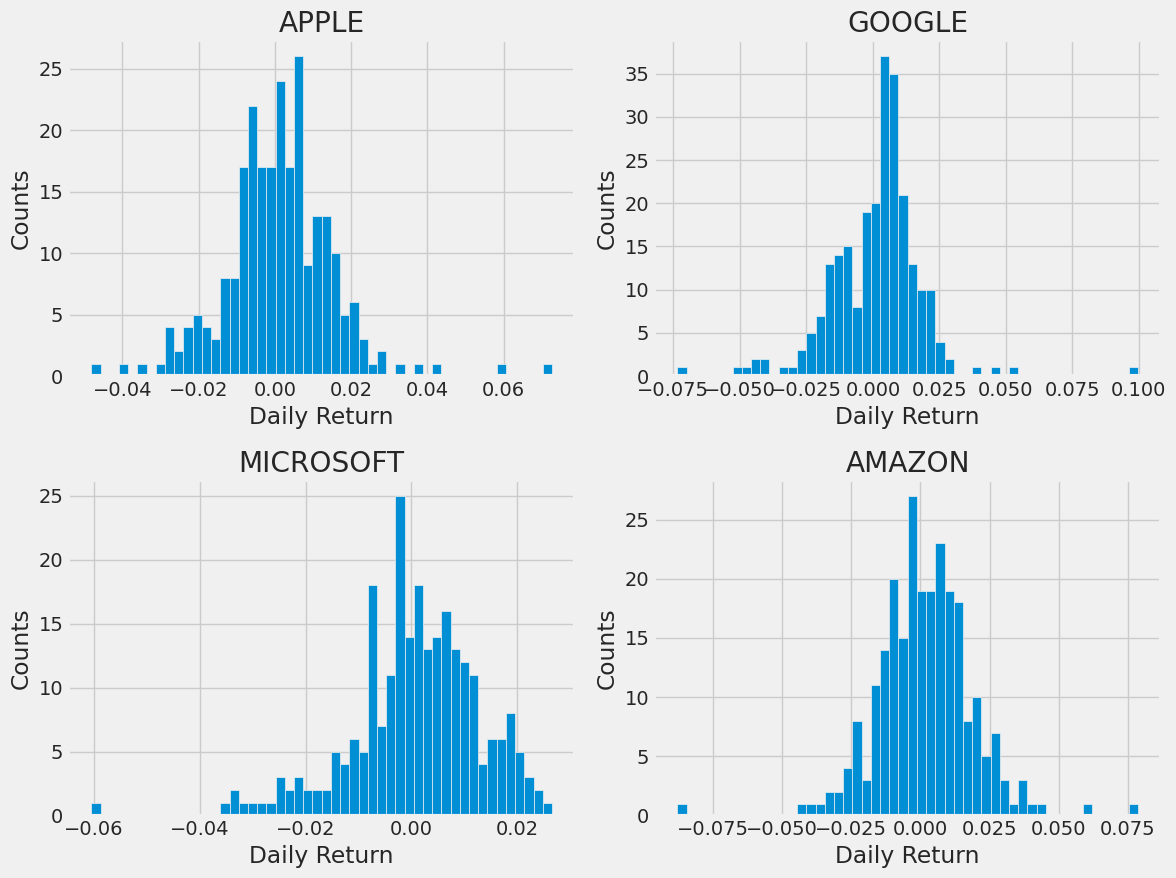

In [ ]:
plt.figure(figsize=(12, 9))

for i, company in enumerate(company_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.xlabel('Daily Return')
    plt.ylabel('Counts')
    plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

# 4. Bagaimana korelasi antara harga penutupan saham yang berbeda?

Korelasi adalah statistik yang mengukur sejauh mana dua variabel bergerak dalam hubungannya satu sama lain, yang memiliki nilai antara -1.0 dan +1.0. Korelasi mengukur hubungan, tetapi tidak menunjukkan apakah x menyebabkan y atau sebaliknya - atau apakah hubungan tersebut disebabkan oleh faktor ketiga.

Sekarang, bagaimana jika kita ingin menganalisis pengembalian semua saham dalam daftar kita? Mari kita buat DataFrame dengan semua kolom ['Close'] untuk setiap dataframe saham.


In [ ]:

# Grab all the closing prices for the tech stock list into one DataFrame
closing_df = yf.download(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change()
tech_rets.head()

[*********************100%***********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-12-04 00:00:00+00:00,NaN,NaN,NaN,NaN
2023-12-05 00:00:00+00:00,0.021063,0.014085,0.013473,0.009156
2023-12-06 00:00:00+00:00,-0.005687,-0.016068,-0.007251,-0.009986
2023-12-07 00:00:00+00:00,0.010139,0.016330,0.053413,0.005830
2023-12-08 00:00:00+00:00,0.007412,0.003676,-0.013073,0.008842


Sekarang kita dapat membandingkan persentase pengembalian harian dari dua saham untuk memeriksa seberapa berkorelasi mereka. Pertama, mari kita lihat sebuah saham dibandingkan dengan dirinya sendiri.


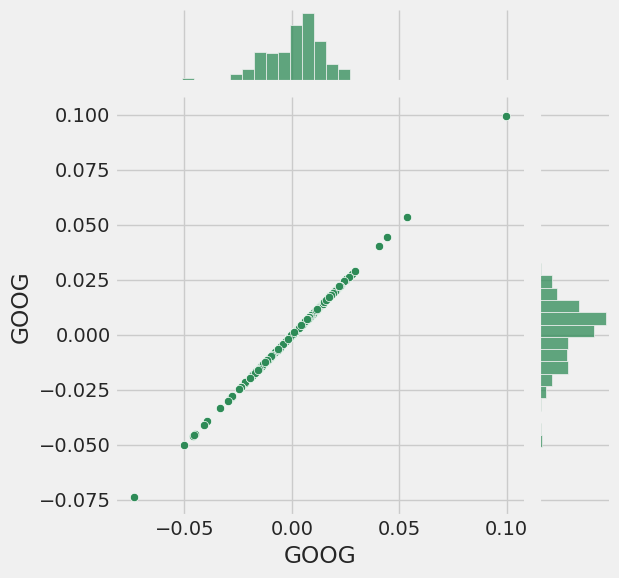

In [ ]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

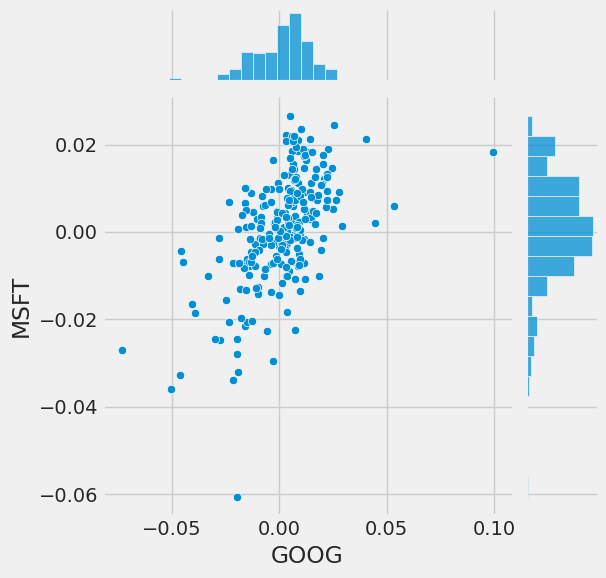

In [ ]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

Jadi sekarang kita dapat melihat bahwa jika dua saham berkorelasi sempurna (dan positif) satu sama lain, maka akan muncul hubungan linier antara nilai pengembalian harian mereka.

Seaborn dan pandas memudahkan untuk mengulang analisis perbandingan ini untuk setiap kemungkinan kombinasi saham dalam daftar ticker saham teknologi kita. Kita dapat menggunakan `sns.pairplot()` untuk membuat plot ini secara otomatis.


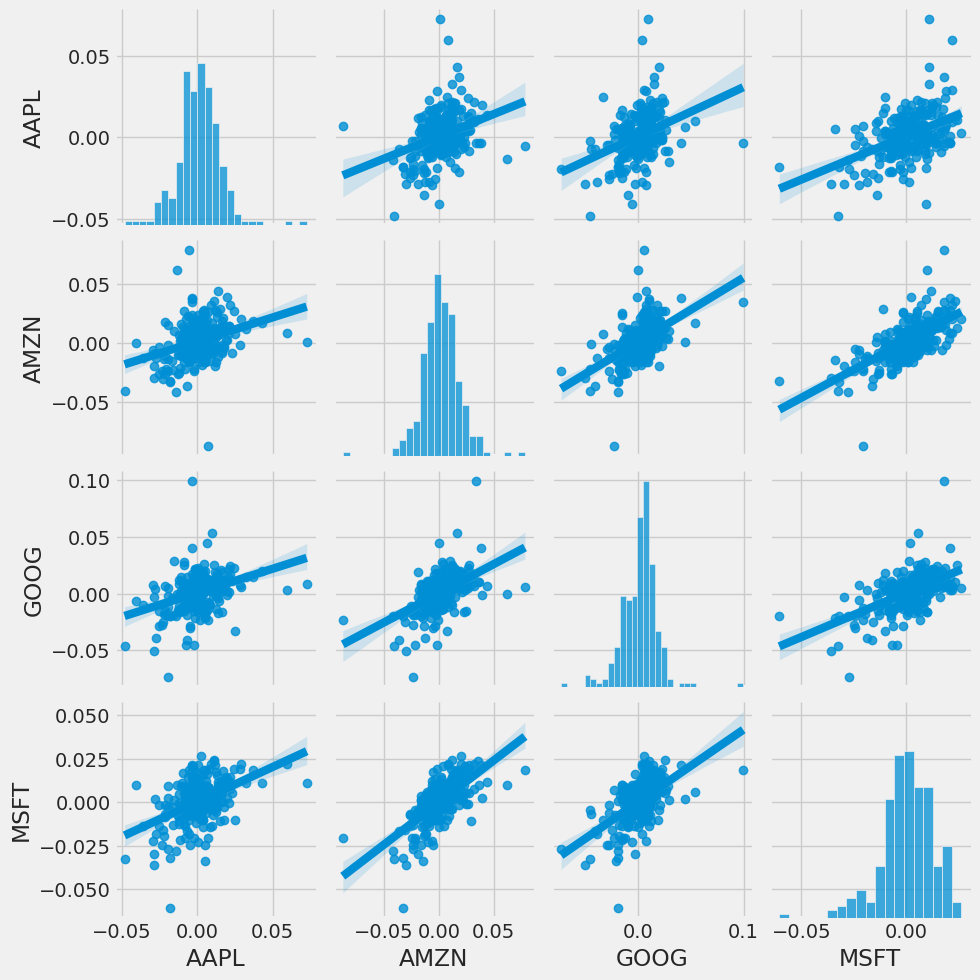

In [ ]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

Di atas kita dapat melihat semua hubungan pengembalian harian antara semua saham. Sekilas terlihat korelasi yang menarik antara pengembalian harian Google dan Amazon. Mungkin menarik untuk menyelidiki perbandingan individu tersebut.

Meskipun kesederhanaan hanya memanggil `sns.pairplot()` sangat fantastis, kita juga dapat menggunakan `sns.PairGrid()` untuk kontrol penuh terhadap gambar, termasuk jenis plot yang ada di diagonal, segitiga atas, dan segitiga bawah. Di bawah ini adalah contoh pemanfaatan kekuatan penuh seaborn untuk mencapai hasil ini.


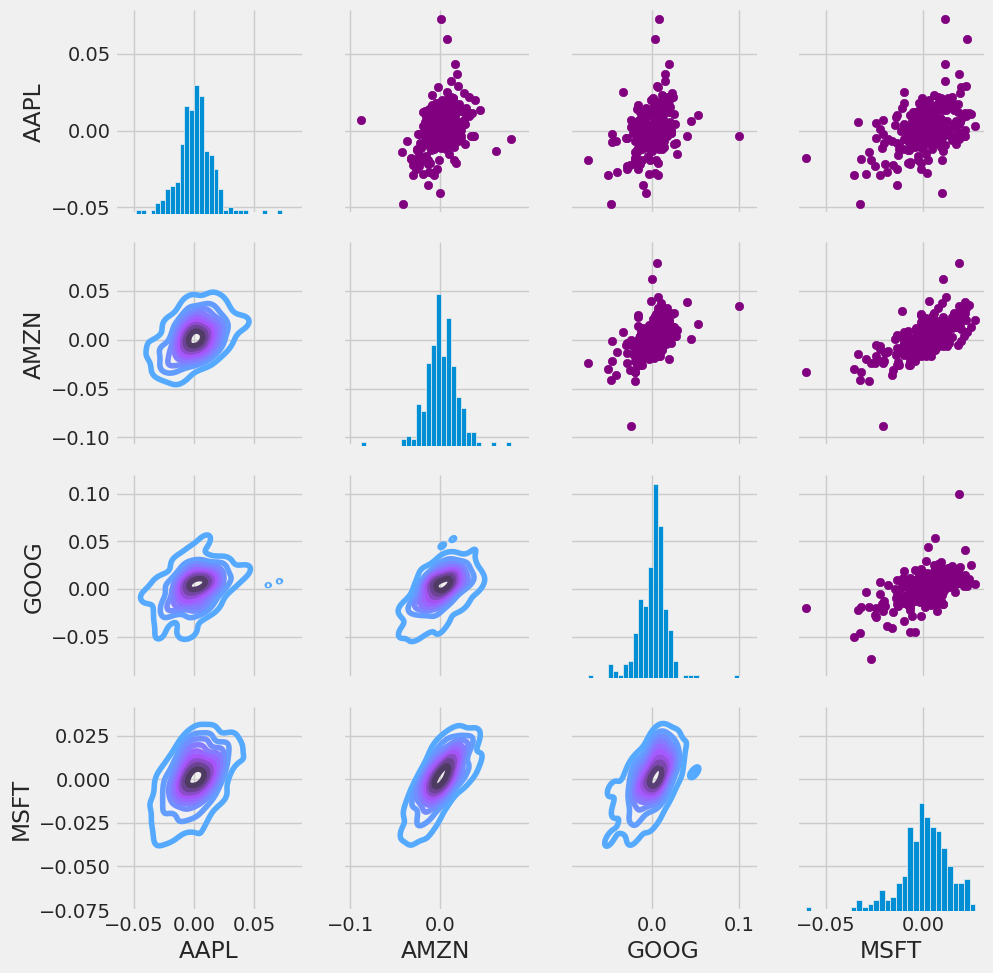

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

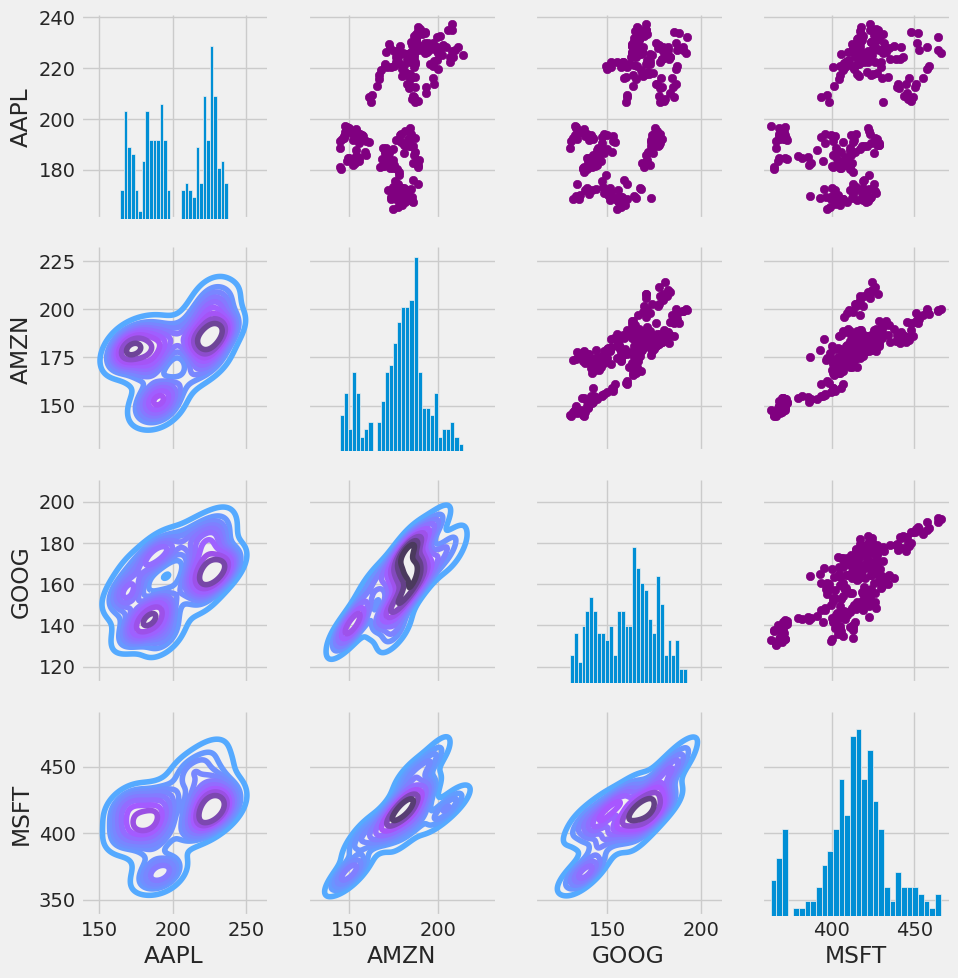

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

Terakhir, kita juga dapat membuat plot korelasi untuk mendapatkan nilai numerik aktual dari korelasi antara nilai pengembalian harian saham. Dengan membandingkan harga penutupan, kita melihat hubungan yang menarik antara Microsoft dan Apple.


Text(0.5, 1.0, 'Correlation of stock closing price')

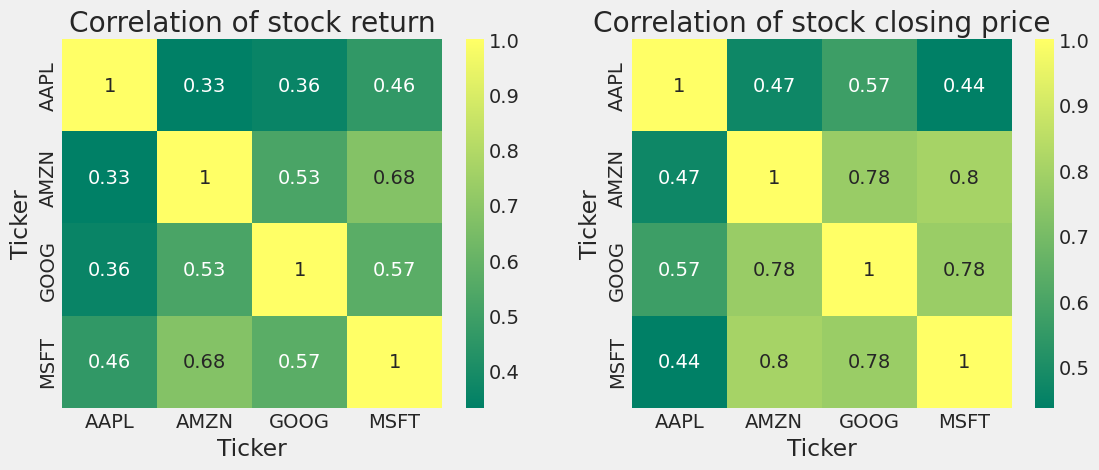

In [ ]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock return')

plt.subplot(2, 2, 2)
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')
plt.title('Correlation of stock closing price')

Seperti yang kita duga dalam `PairPlot` kita, terlihat secara numerik dan visual bahwa Microsoft dan Apple memiliki korelasi terkuat dalam pengembalian saham harian. Menarik juga untuk melihat bahwa semua perusahaan teknologi berkorelasi positif.


# 5. Berapa banyak nilai yang kita pertaruhkan dengan berinvestasi pada saham tertentu?

Ada banyak cara untuk mengukur risiko. Salah satu cara paling dasar dengan menggunakan informasi yang telah kita kumpulkan tentang pengembalian persentase harian adalah dengan membandingkan expected return (pengembalian yang diharapkan) dengan standar deviasi dari pengembalian harian.


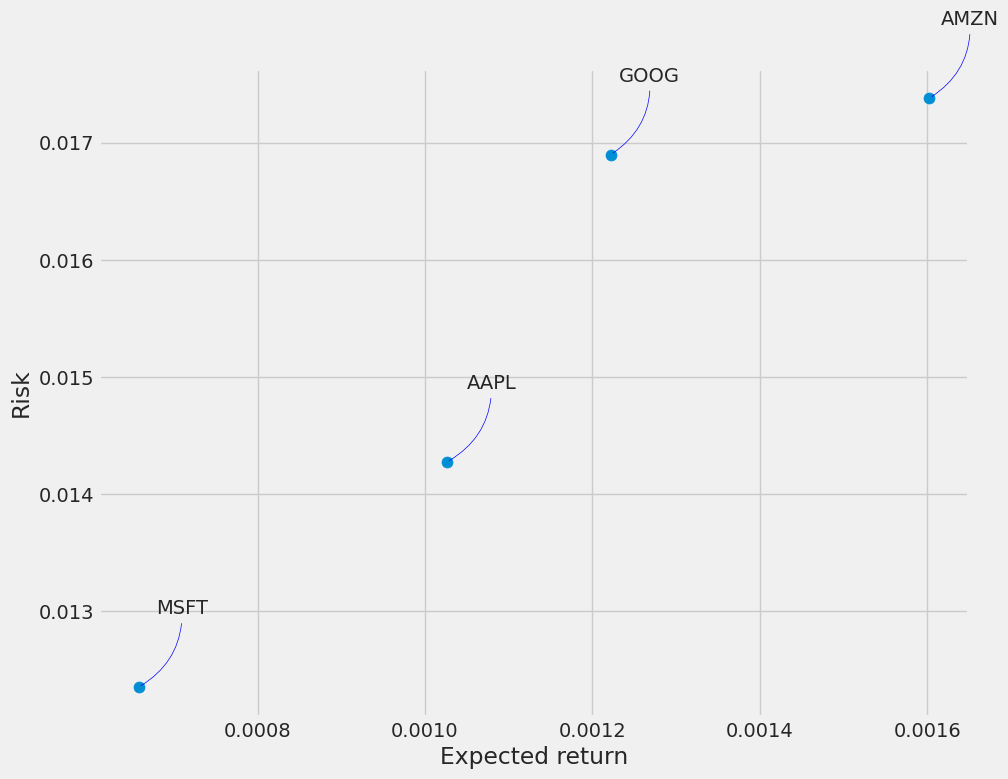

In [ ]:
rets = tech_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

# 6. Bagaimana kita dapat mencoba memprediksi perilaku saham di masa depan?

mengambil data historis harga saham Apple (AAPL) dari Yahoo Finance mulai dari 1 Januari 2012 hingga hari ini, lalu menampilkan beberapa baris pertama dari data tersebut.

In [ ]:
# Get AAPL stock data from 2012-01-01 to today
df = yf.download('AAPL', start='2012-01-01', end=datetime.now())

# Show the data
print(df.head())  # Display the first few rows

[*********************100%***********************]  1 of 1 completed

Price                      Adj Close      Close       High        Low  \
Ticker                          AAPL       AAPL       AAPL       AAPL   
Date                                                                    
2012-01-03 00:00:00+00:00  12.388996  14.686786  14.732143  14.607143   
2012-01-04 00:00:00+00:00  12.455577  14.765714  14.810000  14.617143   
2012-01-05 00:00:00+00:00  12.593860  14.929643  14.948214  14.738214   
2012-01-06 00:00:00+00:00  12.725509  15.085714  15.098214  14.972143   
2012-01-09 00:00:00+00:00  12.705326  15.061786  15.276786  15.048214   

Price                           Open     Volume  
Ticker                          AAPL       AAPL  
Date                                             
2012-01-03 00:00:00+00:00  14.621429  302220800  
2012-01-04 00:00:00+00:00  14.642857  260022000  
2012-01-05 00:00:00+00:00  14.819643  271269600  
2012-01-06 00:00:00+00:00  14.991786  318292800  
2012-01-09 00:00:00+00:00  15.196429  394024400  


membuat grafik garis yang menunjukkan riwayat harga Closing harga saham Apple (AAPL) dari waktu ke waktu.
Sumbu x menunjukkan tanggal, dan sumbu y menunjukkan harga penutupan dalam USD. Grafik ini berguna untuk melihat tren dan fluktuasi harga saham secara visual.

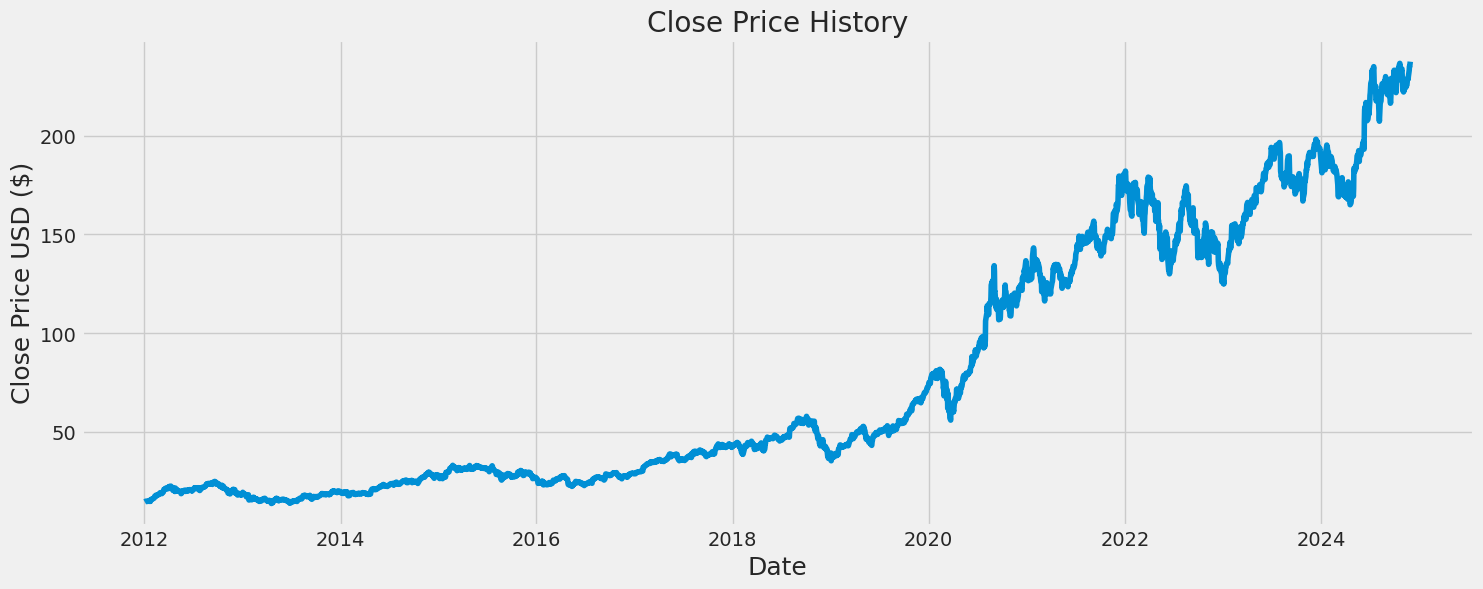

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

mempersiapkan data closing harga saham Apple (AAPL) untuk keperluan pelatihan model machine learning. Data tersebut difilter, diubah menjadi array NumPy, dan kemudian dibagi menjadi data latih (training data) dan data uji (testing data).

In [ ]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

3087

In [ ]:
dataset.info()

menskalakan data closing harga  saham Apple (AAPL) ke dalam rentang 0 hingga 1 menggunakan teknik penskalaan MinMaxScaler. Penskalaan ini penting dalam pembelajaran mesin karena banyak algoritma sensitif terhadap perbedaan skala fitur.

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

ValueError: Found array with 0 feature(s) (shape=(3249, 0)) while a minimum of 1 is required by MinMaxScaler.

membuat set data latih (x_train dan y_train) yang akan digunakan untuk melatih model prediksi harga saham. Setiap titik data dalam x_train adalah urutan 60 hari harga penutupan sebelumnya, dan nilai yang sesuai dalam y_train adalah harga penutupan pada hari berikutnya. Data ini kemudian diubah menjadi array NumPy dan dibentuk ulang menjadi format yang sesuai untuk input model LSTM (Long Short-Term Memory).

In [ ]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.00334711, 0.00370446, 0.00444665, 0.00515326, 0.00504493,
       0.00528909, 0.00517752, 0.00498995, 0.00473447, 0.00552516,
       0.00623825, 0.00601834, 0.0048137 , 0.00596336, 0.00483149,
       0.00907602, 0.00874778, 0.00917627, 0.01010279, 0.01066387,
       0.01061698, 0.01044397, 0.0111813 , 0.01187498, 0.01266083,
       0.01393014, 0.01659652, 0.01663694, 0.01812132, 0.01923055,
       0.01732415, 0.01805825, 0.0180437 , 0.0201021 , 0.01980942,
       0.0203511 , 0.02132451, 0.0218662 , 0.02342657, 0.02456329,
       0.02489154, 0.02500635, 0.02306276, 0.02259383, 0.02266337,
       0.02449054, 0.02500473, 0.02610912, 0.02871243, 0.03218567,
       0.03153564, 0.03153726, 0.03404841, 0.03483426, 0.03427478,
       0.03376382, 0.03323184, 0.03499918, 0.03621191, 0.03671963])]
[0.03546486572351548]

[array([0.00334711, 0.00370446, 0.00444665, 0.00515326, 0.00504493,
       0.00528909, 0.00517752, 0.00498995, 0.00473447, 0.00552516,
       0.00623825, 0.00601834, 0.00

Membangun, mengompilasi, dan melatih model CNN-BiLSTM (Biderictional Long Short-Term Memory) menggunakan Keras untuk memprediksi harga saham.Model ini dirancang untuk menerima urutan harga penutupan sebelumnya (dalam hal ini 60 hari) dan memprediksi harga penutupan pada hari berikutnya.

In [ ]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"


In [ ]:
import tensorflow as tf
with tf.device('/cpu:0'):
    model = Sequential()

    # 1. Conv1D Layer
    model.add(Conv1D(filters=128, kernel_size=5, activation='relu', input_shape=(x_train.shape[1], 1), padding='same'))
    model.add(BatchNormalization())  # Add Batch Normalization
    model.add(Dropout(0.3))  # Increased Dropout rate

    # 2. First BiLSTM Layer
    model.add(Bidirectional(LSTM(128, return_sequences=True)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))  # Increased Dropout rate

    # 3. Second BiLSTM Layer
    model.add(Bidirectional(LSTM(64, return_sequences=False)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    # 4. Dense Layer with L2 Regularization
    model.add(Dense(50, activation='relu'))  # Increased Dense units
    model.add(Dense(1))

    # Compile the model with Adam optimizer and learning rate decay
    optimizer = Adam(learning_rate=0.001, decay=1e-6)
    model.compile(optimizer=optimizer, loss='mean_squared_error')

    # Train the model with increased epochs and batch size
    model.fit(x_train, y_train, batch_size=32, epochs=50)


Epoch 1/50
93/93 [==============================] - 20s 156ms/step - loss: 0.4637
Epoch 2/50
93/93 [==============================] - 14s 155ms/step - loss: 0.1600
Epoch 3/50
93/93 [==============================] - 13s 143ms/step - loss: 0.0969
Epoch 4/50
93/93 [==============================] - 13s 144ms/step - loss: 0.0722
Epoch 5/50
93/93 [==============================] - 13s 139ms/step - loss: 0.0490
Epoch 6/50
93/93 [==============================] - 13s 141ms/step - loss: 0.0377
Epoch 7/50
93/93 [==============================] - 13s 144ms/step - loss: 0.0254
Epoch 8/50
93/93 [==============================] - 13s 142ms/step - loss: 0.0165
Epoch 9/50
93/93 [==============================] - 13s 143ms/step - loss: 0.0125
Epoch 10/50
93/93 [==============================] - 14s 146ms/step - loss: 0.0101
Epoch 11/50
93/93 [==============================] - 13s 141ms/step - loss: 0.0073
Epoch 12/50
93/93 [==============================] - 13s 144ms/step - loss: 0.0066
Epoch 13/50
9

In [ ]:
pip install visualkeras


Note: you may need to restart the kernel to use updated packages.


visualisasi struktur model Keras yang telah Anda buat sebelumnya. Visualisasi ini menampilkan lapisan-lapisan model secara grafis, termasuk jenis lapisan, jumlah parameter, dan koneksi antara lapisan. Ini sangat membantu untuk memahami arsitektur model secara intuitif.

In [ ]:
import visualkeras
# Visualize the model
img = visualkeras.layered_view(model, legend=True)  # Get the image
img.save("model_visualization3.png")  # Save the image in a supported format

# Display the image
img.show()

Error: no "view" mailcap rules found for type "image/png"
/usr/bin/xdg-open: 869: www-browser: not found
/usr/bin/xdg-open: 869: links2: not found
/usr/bin/xdg-open: 869: elinks: not found
/usr/bin/xdg-open: 869: links: not found
/usr/bin/xdg-open: 869: lynx: not found
/usr/bin/xdg-open: 869: w3m: not found
xdg-open: no method available for opening '/tmp/tmp_5ybe4qk.PNG'


visualisasi struktur model Keras menggunakan fungsi plot_model dari TensorFlow Keras. Visualisasi ini akan disimpan sebagai gambar PNG dan kemudian ditampilkan menggunakan matplotlib.

In [ ]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Visualize the model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Load the image and display it
img = plt.imread('model_plot.png')
plt.imshow(img)
plt.axis('off')
plt.show()

NameError: name 'plot_model' is not defined

membuat set data uji (x_test dan y_test), menggunakan model CNN- BiLSTM yang sudah dilatih sebelumnya untuk melakukan prediksi pada data uji, lalu menghitung Root Mean Squared Error (RMSE) sebagai metrik evaluasi performa model.

In [ ]:
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# Assuming the model has been trained and saved previously
# ... Your code to build and train the model ...

# Create the testing data set
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Perform prediction with CPU
with tf.device('/cpu:0'):
    predictions = model.predict(x_test)

predictions = scaler.inverse_transform(predictions)

# Calculate RMSE
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
print("RMSE:", rmse)


5/5 [==============================] - 1s 45ms/step
RMSE: 16.966017011825006


In [ ]:
# Root Mean Squared Error (RMSE) - sudah ada di kode Anda
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))

# Mean Squared Error (MSE)
mse = np.mean(((predictions - y_test) ** 2))

# Mean Absolute Error (MAE)
mae = np.mean(np.abs(predictions - y_test))

print('MAE:', mae)
print('MSE:', mse)
print('RMSE:', rmse)


MAE: 12.479819865166386
MSE: 287.84573324553554
RMSE: 16.966017011825006


In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Show the valid and predicted prices
valid

In [ ]:
import tensorflow as tf

print("Available GPUs: ", tf.config.list_physical_devices('GPU'))


2024-08-14 14:20:40.730618: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Available GPUs:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
